# Purwadhika Data Science & Machine Learning
# Capstone 3 - E-commerce Churn
## by Haiwal Fezra

# Latar Belakang
Dalam bisnis apapun, pelanggan adalah segalanya. Produk ataupun layanan yang dijajakan oleh perusahaan tidak akan ada artinya jika tidak ada pelanggan yang membelinya. Itulah mengapa mendapatkan dan mempertahankan pelanggan akan menjadi  fokus utama dalam bisnis perusahaan.

Saat ini masyarakat kita tidak lagi perlu pergi ke pasar untuk membeli barang yang ia inginkan, karena sekarang ini sudah banyak tersedia layanan *Electronic commerce* atau **E-commerce** yang dapat membuat pelanggan dapat membeli barang yang diinginkan tanpa harus meninggalkan rumah. Akan tetapi pasar layanan E-commerce di Indonesia sudah dipadati oleh banyak perusahaan, yang masing-masing memberikan layanan dan pengalaman belanja yang unik. Pelanggan layanan E-commerce memiliki banyak pilihan dalam memilih layanan mana yang cocok dengan mereka dan dapat dengan mudahnya berpindah ke penyedia layanan lain jika menemukan penyedia layanan E-commerce yang lebih baik.

Dengan padatnya persaingan pasar E-commerce ini, masalah baru timbul untuk tiap-tiap perusahaan, dan tidak terkecuali PT ToGo, yang memiliki layanan E-commerce bernama **Pasarpedia**, yaitu tingginya angka *Churn Rate* pada pelanggan yang menggunakan layanan mereka. Untuk mengatasi hal ini PT ToGo, mengkonsultasikan permasalahan ini kepada Tim Data Science Purwadhika.

Target (Churn) :

0 = Pelanggan tidak berpindah ke kompetitor

1 = Pelanggan berpindah ke kompetitor

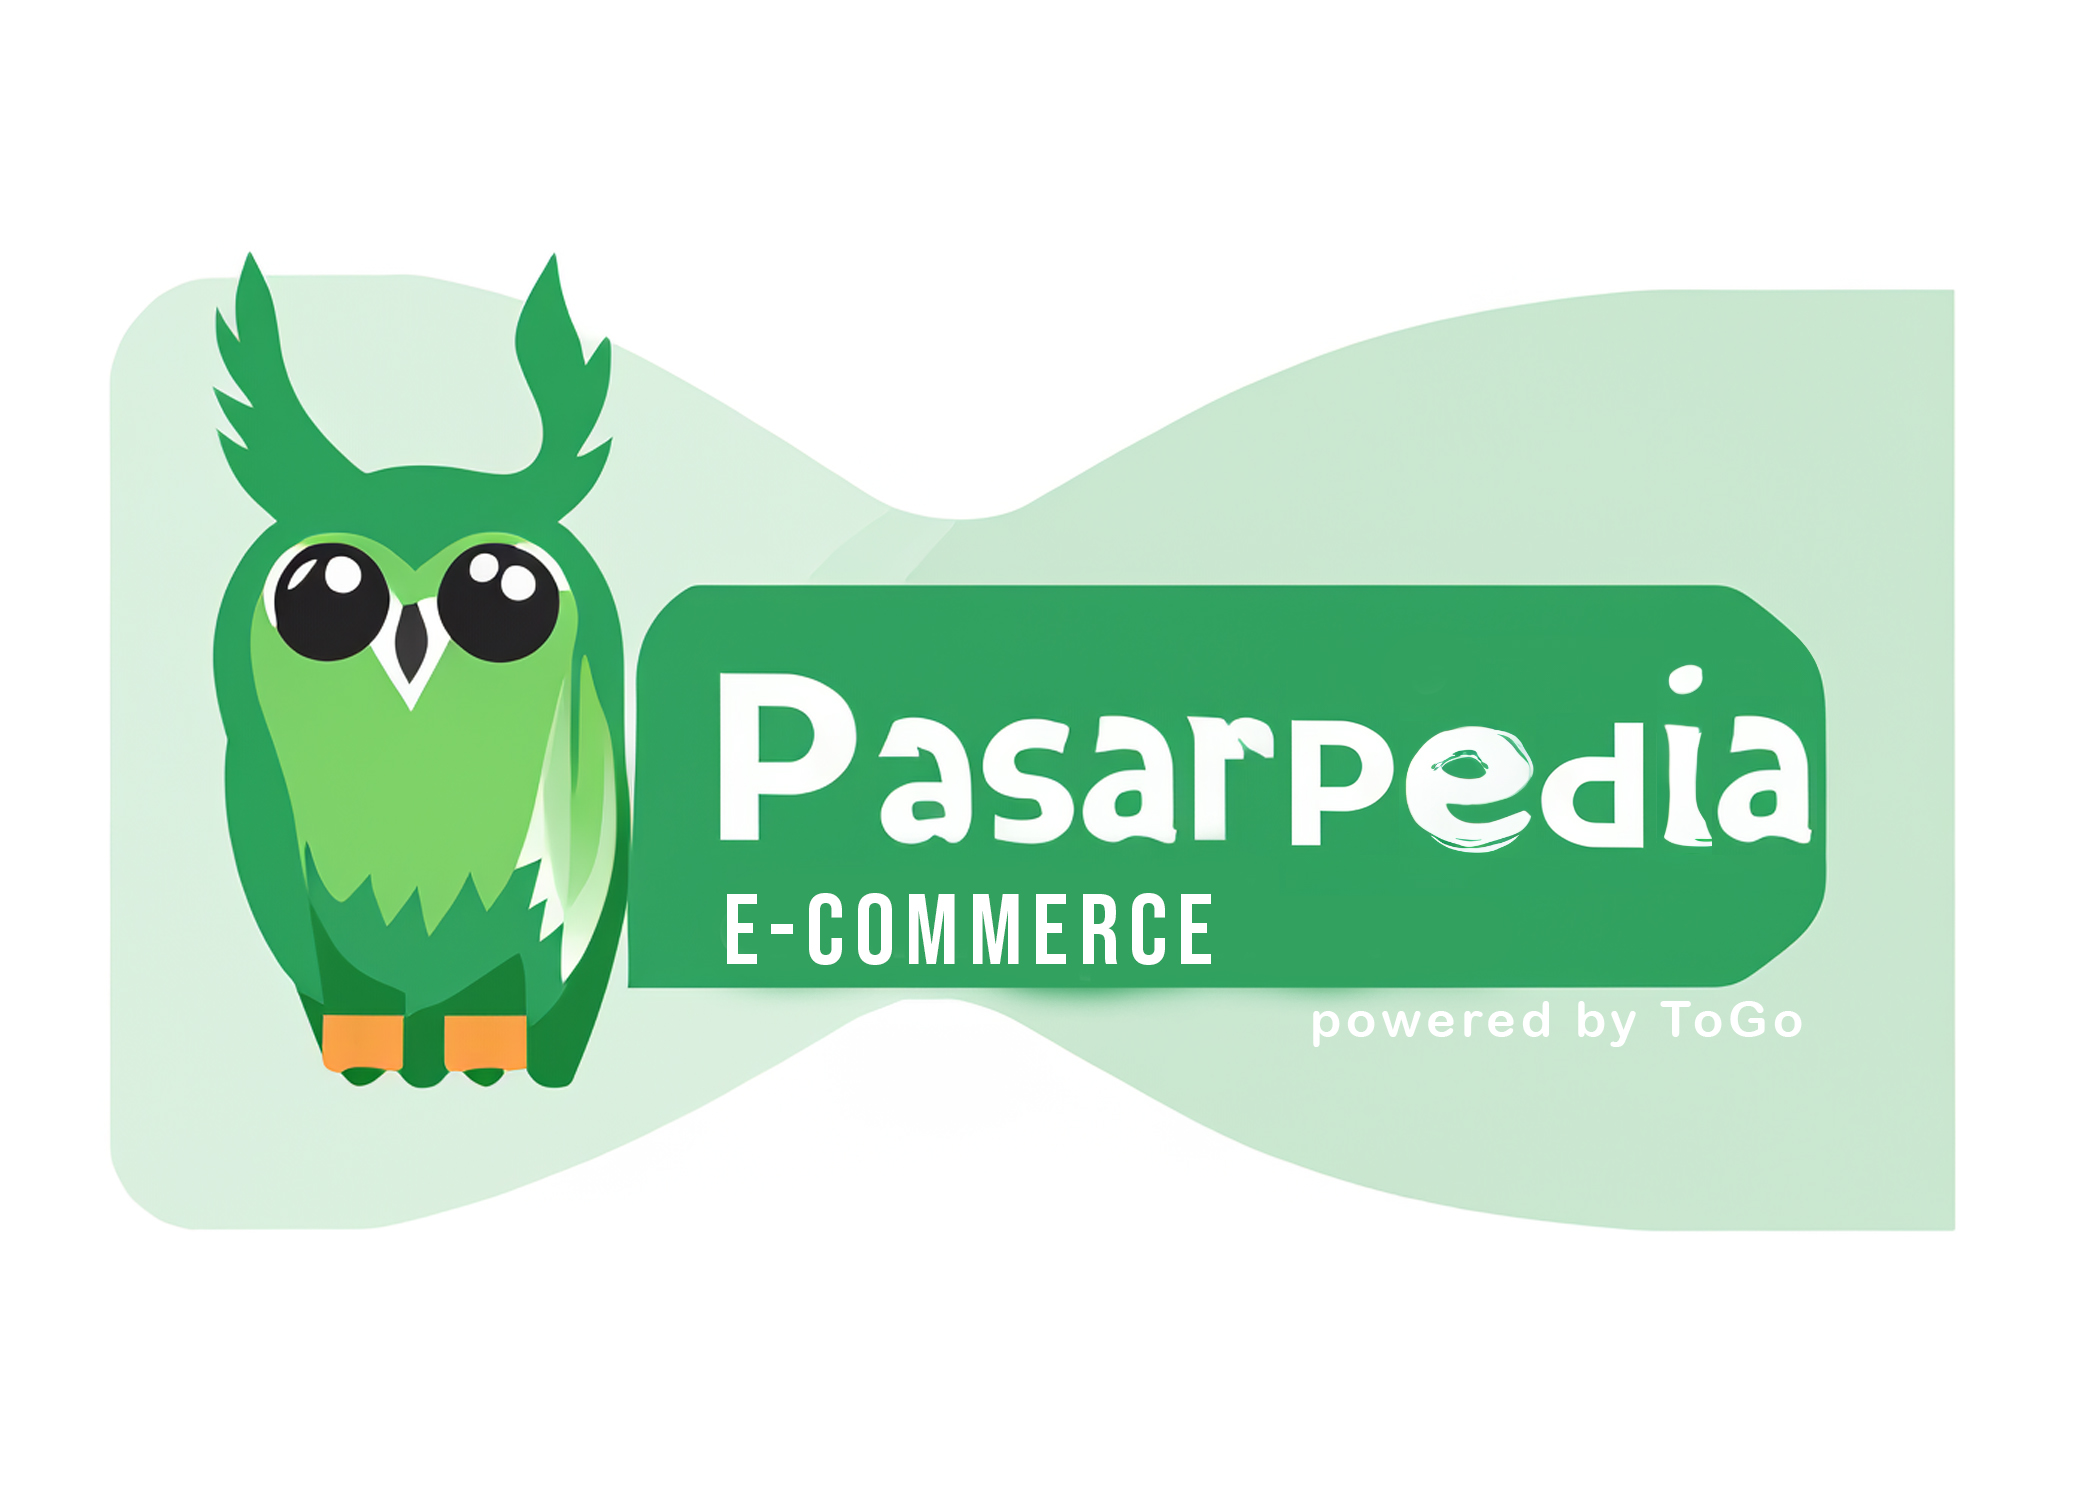

## Perumusan Masalah
Proses mendapatkan pelanggan baru dapat memakan banyak biaya dibandingkan dengan mempertahankan pelanggan lama, oleh karena itu PT ToGo ingin mengetahui pelanggan mana yang memiliki potensi untuk *Churn* sehingga mereka dapat memberikan promosi pada mereka di layanan Pasarpedia. Promosi tepat guna inilah yang dapat membuat pelanggan tidak berpindah ke kompetitor dan tetap memilih Pasarpedia sebagai layanan E-commerce favorit mereka.

Akan tetapi jika promosi itu diberikan pada pelanggan yang memang tidak akan *Churn* maka biaya promosi tersebut akan menjadi sia-sia.

## Goal
1. Berdasarkan permasalahan diatas, maka PT ToGo menginginkan kemampuan prediksi akan pelanggan mana yang kemungkinan akan *Churn* ataupun tidak, sehingga perusahaan dapat mengeluarkan biaya promosi secara efisien.

1. PT ToGo juga ingin mengetahui faktor-faktor apa saja yang paling mempengaruhi seorang pelanggan untuk berpindah ke kompetitor atau tidak.

## Analytic Approach

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu pelanggan dengan pelanggan lainnya. 

Selanjutnya, kita akan membangun suatu model klasifikasi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi probabilitas seorang pelanggan akan berpindah ke layanan kompetitor ataupun tidak.

## Metric Evaluation


<img src="https://i0.wp.com/statisticallyrelevant.com/wp-content/uploads/2023/12/Conf-edited.png?w=800&ssl=1" width="300">

Type 1 error : *False Positive*  
Konsekuensi: biaya promosi tidak efektif/terbuang

Type 2 error : *False Negative*  
Konsekuensi: kehilangan pelanggan untuk dipertahankan 

Berdasarkan konsekuensi diatas, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi biaya promosi dari PT ToGo, tetapi tanpa kehilangan pelangga potensial yang mungkin bisa dipertahankan oleh perusahaan. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive. Jadi nanti metric utama yang akan kita gunakan adalah **roc_auc**.

# Data
Untuk menjawab permasalahan diatas, kita akan menganalisa data yang sudah dikumpulkan, yang dapat diakses pada [link](https://drive.google.com/drive/folders/1PITb78NtK9Ra6wOkQdXCIgItZkj29Ves) berikut.


In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from scikitplot.metrics import plot_roc_curve
import lightgbm as lgb

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_ecommerce_customer_churn.csv')
display(df.head(),df.tail())

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1
3940,2.0,7.0,3,Laptop & Accessory,5,Married,1,0,2.0,153.73,0


In [33]:
display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


In [3]:
df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

Features
1. Tenure: Lamanya bergabung seorang pelanggan dalam layanan perusahaan (asumsi dalam Bulan).
1. WarehouseToHome: Jarak antara gudang ke rumah pelanggan.
1. NumberOfDeviceRegistered: Total jumlah perangkat yang terdaftar pada seorang pelanggan tertentu.
1. PreferedOrderCat: Kategori pesanan yang disukai oleh pelanggan dalam bulan terakhir.
1. SatisfactionScore: Skor kepuasan pelanggan terhadap layanan.
1. MaritalStatus: Status pernikahan pelanggan.
1. NumberOfAddress: Total jumlah alamat yang ditambahkan pada seorang pelanggan tertentu.
1. Complaint: Apakah ada keluhan yang diajukan dalam bulan terakhir.
1. DaySinceLastOrder: Jumlah hari sejak pelanggan melakukan pesanan terakhir.
1. CashbackAmount: Rata-rata cashback yang diterima dalam sebulan terakhir.
***
Target
1. Churn: Tanda churn, menunjukkan apakah pelanggan cenderung untuk berhenti berlangganan.

# Data Understanding


In [4]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [5]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[30.0, 6.0]"
1,WarehouseToHome,float64,169,4.29,33,"[17.0, 29.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[2, 5]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Fashion]"
4,SatisfactionScore,int64,0,0.00,5,"[3, 5]"
5,MaritalStatus,object,0,0.00,3,"[Married, Single]"
6,NumberOfAddress,int64,0,0.00,14,"[9, 22]"
7,Complain,int64,0,0.00,2,"[1, 0]"
8,DaySinceLastOrder,float64,213,5.40,22,"[15.0, 5.0]"
9,CashbackAmount,float64,0,0.00,2335,"[202.48, 142.72]"


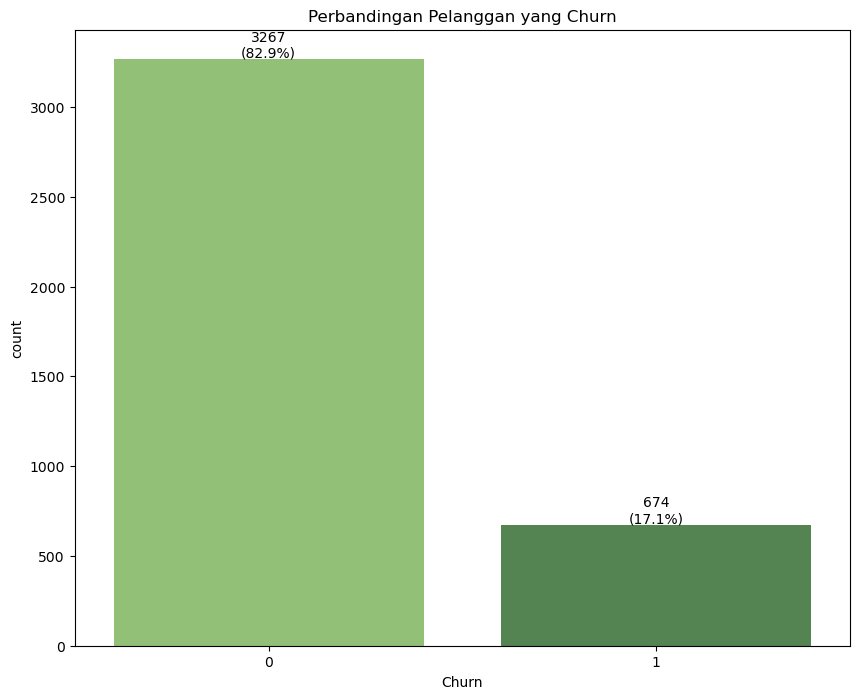

In [3]:
#melihat perbandingan pelanggan yang Churn dan tidak
total_count = len(df)
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(10, 8))
colors = ["#8FCC6A", "#4C8C4A"]
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x='Churn', data=df, palette=colors)
for p in ax.patches:
    count_value = int(p.get_height())
    percentage_value = round((p.get_height() / total_count) * 100, 1)
    ax.annotate(f'{count_value}\n({percentage_value}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Perbandingan Pelanggan yang Churn")
plt.show()

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

# Data Cleaning
Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi ataupun yang memiliki korelasi tinggi antar fitur.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.
- Melihat kondisi outlier, dan menghapus baris yang dianggap akan merusak model.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [3]:
# Membuat duplikasi dataframe
df_model = df.copy()

## Feature Selection

Pada tahap ini kita akan menghapus fitur yang tidak memiliki relevansi terhadap hasil yang kita inginkan, fitur yang bisa kita drop diantaranya :
- `MaritalStatus` : fitur ini dihilangkan guna menghilangkan bias yang dapat terjadi pada model, yaitu model akan melihat apakah pelanggan tersebut masih lajang ataupun bercerai, dimana hal itu tidak kita inginkan pada model yang kita buat.

In [4]:
# menghapus kolom 'MaritalStatus'
df_model.drop(columns='MaritalStatus', inplace=True)

Berikutnya kita akan melihat korelasi antar fitur, maka sebelumnya kita akan meng-*encode* fitur yang memiliki tidak memiliki nilai integer atau float, dimana hanya pada fitur `PreferedOrderCat`. 
kita akan mengencode tanpa fitting terlebih dahulu untuk menghindari *data leakage* pada dataset ini, maka sebelumnya dataset model akan di *copy* terlebih dahulu

In [25]:
# Membuat duplikasi dataframe model untuk cek korelasi
df_corr = df_model.copy()

# one-hot encoding dengan pd.get_dummies
df_encoded = pd.get_dummies(df_corr['PreferedOrderCat'], prefix='PreferedOrderCat')

# menggabungkan dataframe
df_encoded = pd.concat([df_corr, df_encoded], axis=1)

# Drop kolom 'PreferedOrderCat'
df_encoded.drop(['PreferedOrderCat'], axis=1, inplace=True)
df_encoded

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
0,15.0,29.0,4,3,2,0,7.0,143.32,0,False,False,True,False,False,False
1,7.0,25.0,4,1,2,0,7.0,129.29,0,False,False,False,True,False,False
2,27.0,13.0,3,1,5,0,7.0,168.54,0,False,False,True,False,False,False
3,20.0,25.0,4,3,7,0,3.0,230.27,0,True,False,False,False,False,False
4,30.0,15.0,4,4,8,0,8.0,322.17,0,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,3,8,0,1.0,231.86,0,True,False,False,False,False,False
3937,8.0,7.0,2,2,4,0,4.0,157.80,0,False,False,False,False,True,False
3938,30.0,6.0,5,3,3,1,2.0,156.60,0,False,False,True,False,False,False
3939,6.0,14.0,4,3,10,1,0.0,124.37,1,False,False,False,True,False,False


seperti terlihat pada dataframe encoded diatas bahwa kolom `PreferedOrderCat` telah di *encode* menjadi 6 kolom, yaitu `PreferedOrderCat_Fashion`, `PreferedOrderCat_Grocery`, `PreferedOrderCat_Laptop & Accessory`, `PreferedOrderCat_Mobile`, `PreferedOrderCat_Mobile Phone` dan, `PreferedOrderCat_Others`.

kemudian kita akan mulai uji korelasinya, untuk uji korelasi ini kita asumsikan bahwa hubungan antar fitur memiliki hubungan yang linear, dan oleh karena itu kita akan menggunakan uji korelasi Pearson.

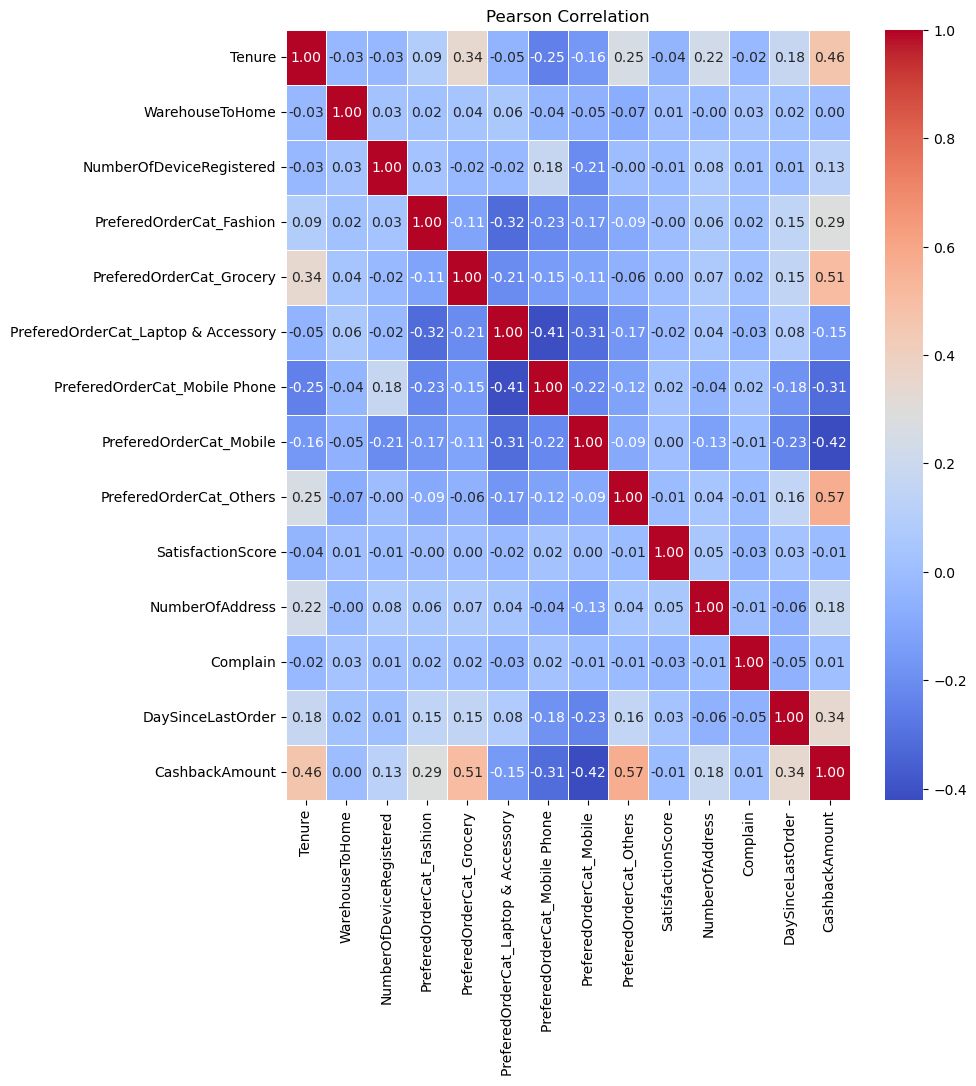

In [76]:
# Pearson correlation
pearson_corr = df_encoded[['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Mobile', 'PreferedOrderCat_Others', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']].corr(method='pearson')
# Heatmap for visual representation
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation')
plt.show()

Seperti yang terlihat pada uji korelasi Pearson diatas, tidak ada fitur yang memiliki hubungan korelasi yang kuat, dan hanya terdapat beberapa fitur yang memiliki korelasi moderat yaitu fitur `Tenure`, `PreferedOrderCat_Grocery`, dan `PreferedOrderCat_Others` dengan satu fitur yaitu `CashbackAmount`, dan pada beberapa kolom `PreferedOrderCat` juga memiliki nilai korelasi (positif ataupun negatif) pada jumlah *cashback*.

Untuk ini, kita memiliki pilihan untuk drop kolom `PreferedOrderCat` secara keseluruhan, dan juga guna untuk menghindari *overfitting* pada model kita ini.

In [5]:
# menghapus kolom 'PreferedOrderCat'
df_model.drop(columns='PreferedOrderCat', inplace=True)

## Handling Missing Values

Terdapat beberapa data yang hilang/kosong dibeberapa fitur, yang ditandai dengan `NaN`, untuk ini mari kita cek sebaran *missing value* pada dataset ini

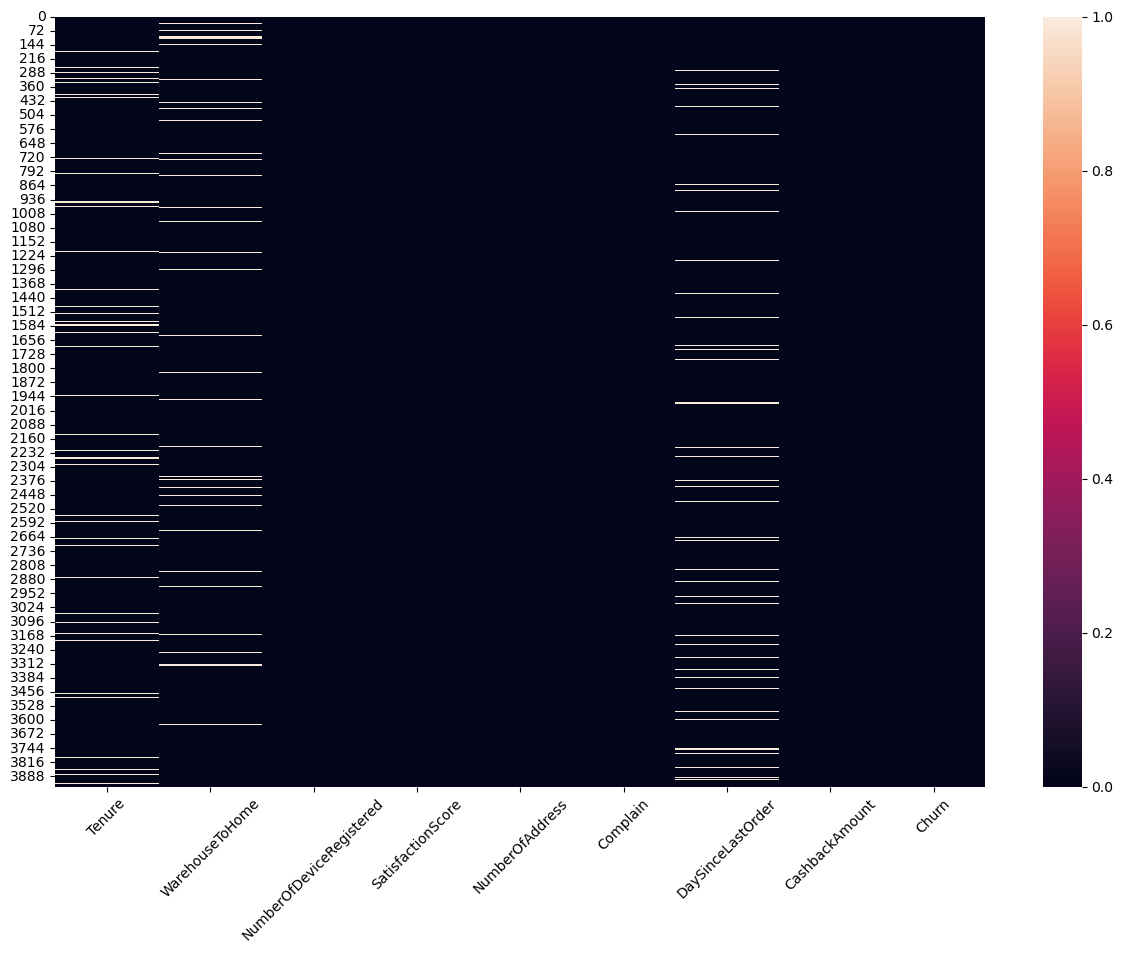

In [6]:
# Sebaran missing value di dalam data
plt.figure(figsize=(15,10))
sns.heatmap(df[['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn']].isna())
plt.xticks(rotation = 45)
plt.show()

Missing Value pada dataset ini secara garis besar:  
* pada kolom `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder` memiliki proporsi yang cukup kecil (**sekitar 5%**).
* terlihat pada heatmap bahwa data yang hilang tersebar secara merata dan bukan terhubung satu sama lain atau berkumpul pada suatu titik data tertentu.

Untuk menangani missing value pada dataset ini, dapat menggunakan cara yaitu:
* Mengisi missing value dengan simple imputer dengan memperhatikan sebaran datanya, yaitu dengan cara memasukan nilai mean/median/modus yang diikuti dengan melihat sebaran data terlebih dahulu. Dengan cara ini besar harapannya nilai yang diisi pada missing value akan mendekati nilai yang sebenarnya.

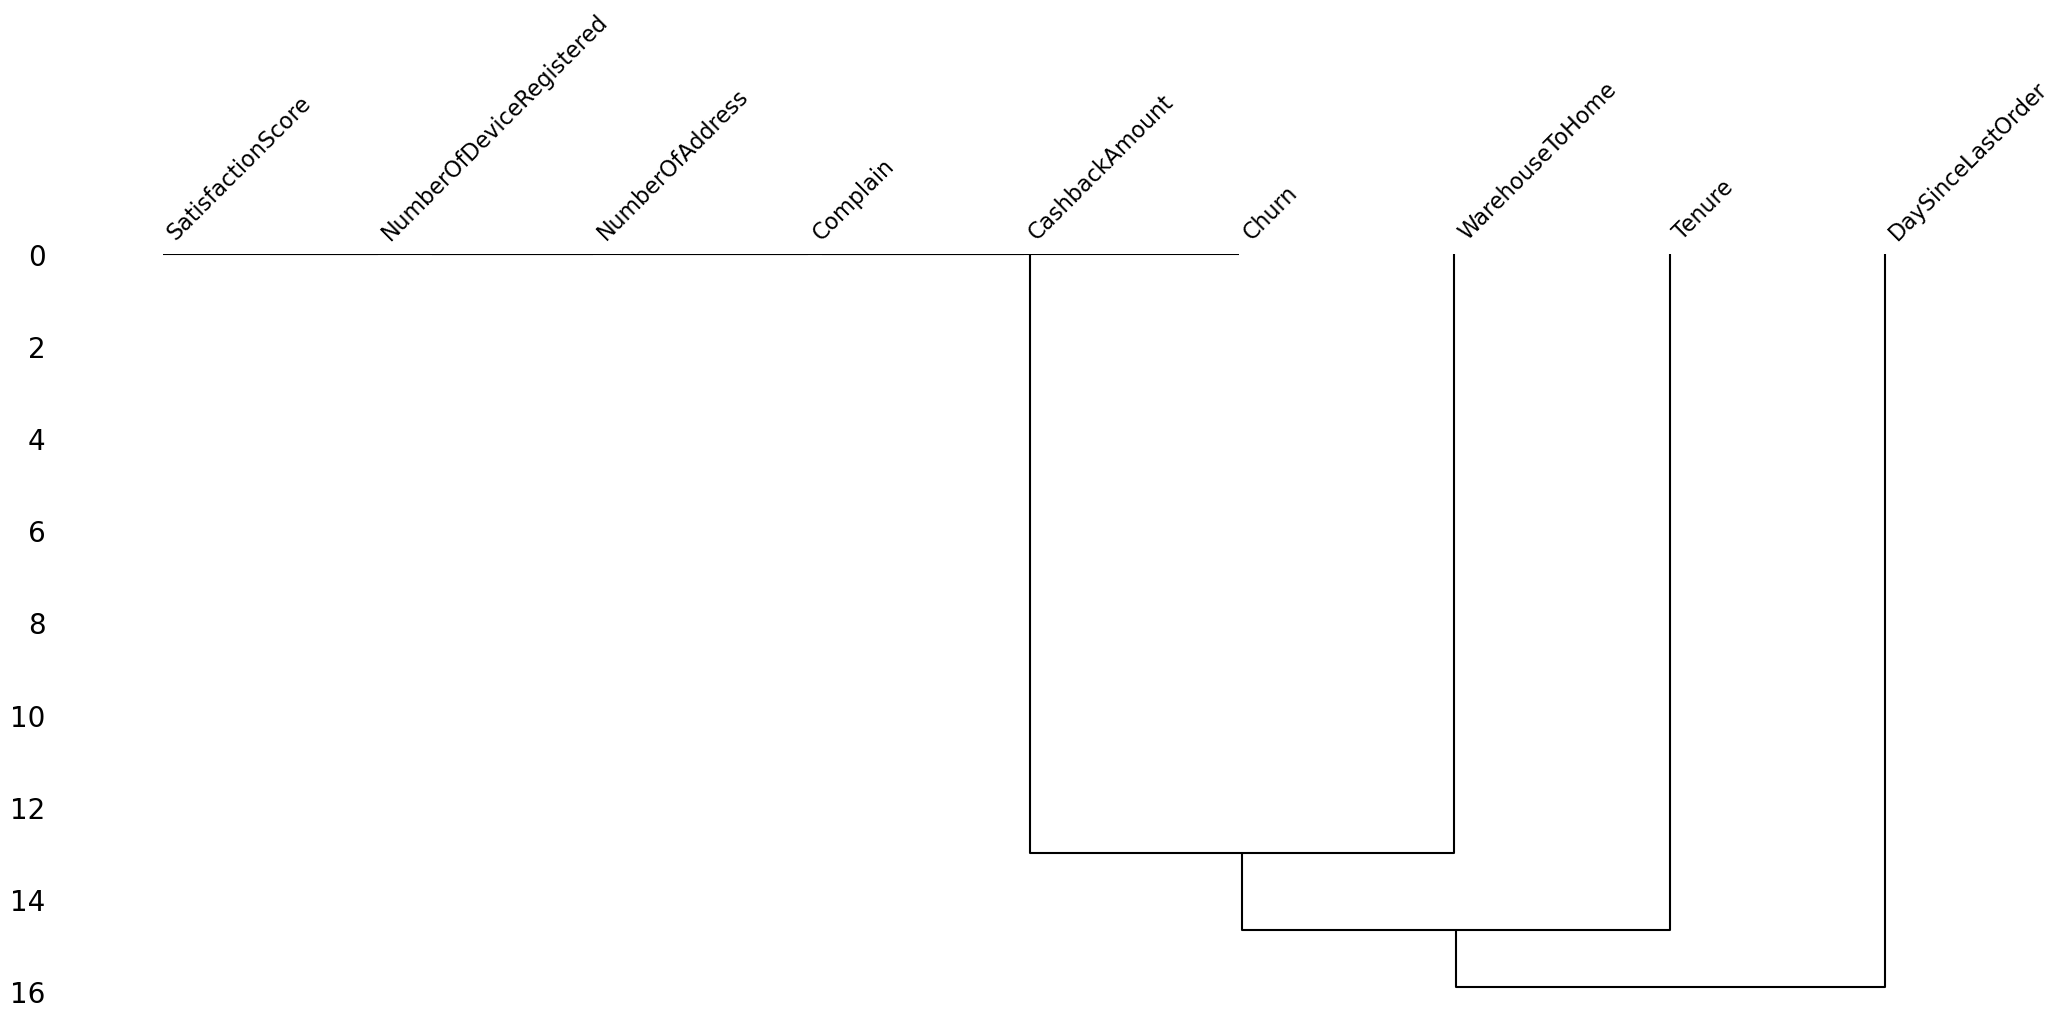

In [8]:
msno.dendrogram(df_model)
plt.show()

pada dendrogram diatas terlihat bahwa *missing value* pada dataset ini tidak terlalu berhubungan satu sama dengan lainnya, sehingga cukup diisi dengan simple imputer pada masing-masing fitur nya saja.

### Handling missing value on Tenure



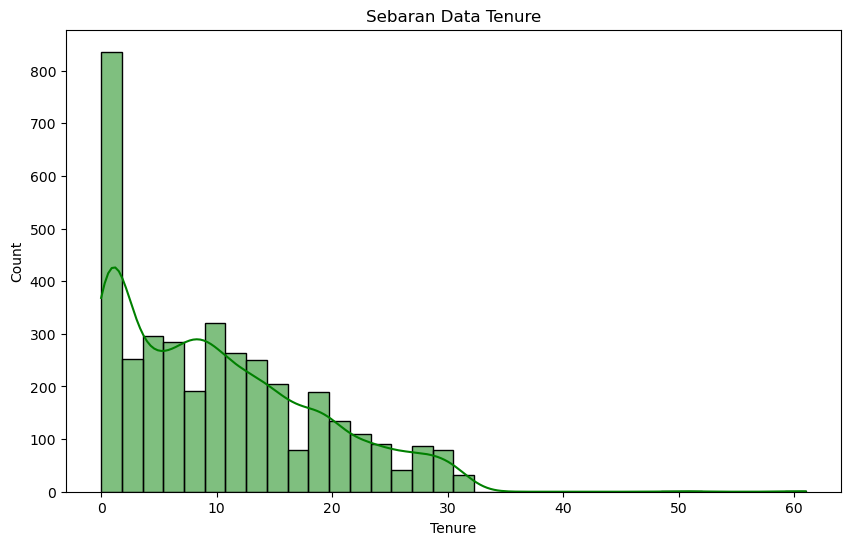

In [81]:
#Melihat Sebaran Data `Tenure`
plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure'], kde=True, color='#008000')
plt.title("Sebaran Data Tenure")
plt.show()

Dapat terlihat bahwa jumlah pelanggan yang baru berlangganan lebih banyak, sehingga data tidak terdistribusi normal, kita akan menggunakan simple imputer dengan metode **median**.

In [13]:
# nilai median
df['Tenure'].median()

9.0

In [7]:
# memasukan nilai median pada kolom Tenure
imputer = SimpleImputer(strategy='median')
df_model['Tenure'] = imputer.fit_transform(df_model[['Tenure']])

In [8]:
# Cek apakah masih ada missing value pada kolom Tenure
df_model['Tenure'].isna().sum()

0

### Handling missing value on WarehouseToHome



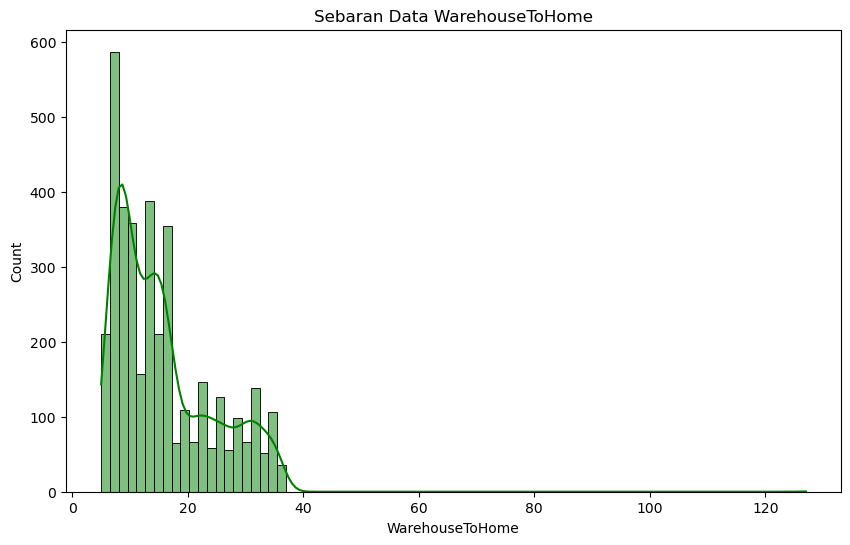

In [80]:
#Melihat Sebaran Data `WarehouseToHome`
plt.figure(figsize=(10, 6))
sns.histplot(df['WarehouseToHome'], kde=True, color='#008000')
plt.title("Sebaran Data WarehouseToHome")
plt.show()

sama seperti fitur `Tenure`, pada fitur `WarehouseToHome` ini kita akan mengisinya dengan Median karena terlihat datanya *Skewed Right*.

In [21]:
# nilai median
df['WarehouseToHome'].median()

14.0

In [8]:
# memasukan nilai median pada kolom WarehouseToHome
imputer = SimpleImputer(strategy='median')
df_model['WarehouseToHome'] = imputer.fit_transform(df_model[['WarehouseToHome']])

In [10]:
# Cek apakah masih ada missing value pada kolom WarehouseToHome
df_model['WarehouseToHome'].isna().sum()

0

### Handling missing value on DaySinceLastOrder



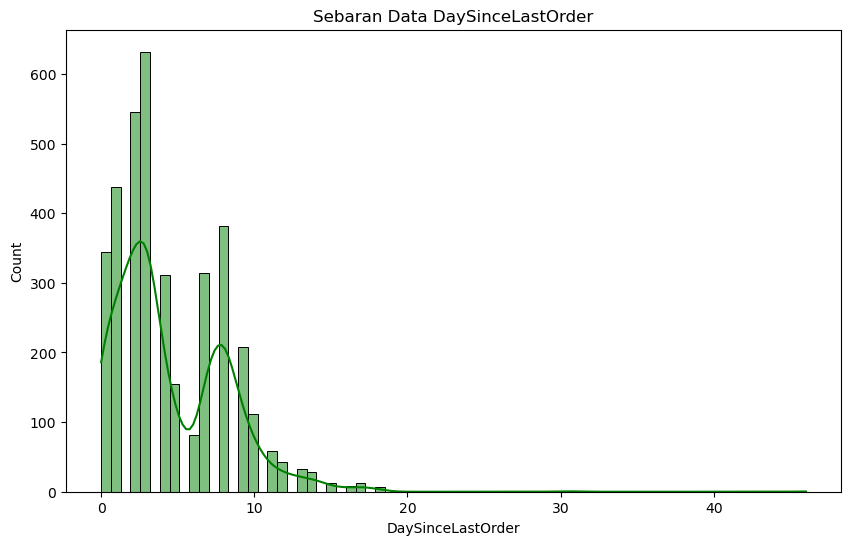

In [12]:
#Melihat Sebaran Data `DaySinceLastOrder`
plt.figure(figsize=(10, 6))
sns.histplot(df['DaySinceLastOrder'], kde=True, color='#008000')
plt.title("Sebaran Data DaySinceLastOrder")
plt.show()

In [21]:
# nilai median
df['DaySinceLastOrder'].median()

14.0

In [9]:
# memasukan nilai median pada kolom DaySinceLastOrder
imputer = SimpleImputer(strategy='median')
df_model['DaySinceLastOrder'] = imputer.fit_transform(df_model[['DaySinceLastOrder']])

In [12]:
# Cek apakah masih ada missing value pada kolom DaySinceLastOrder
df_model['DaySinceLastOrder'].isna().sum()

0

In [10]:
# cek jumlah missing value pada dataset model
df_model.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
SatisfactionScore           0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

sudah tidak terdapat missing value pada df_model.

## Handling Outliers

Setelah dataset model bersih dari *missing value*, sekarang kita akan melihat outlier pada beberapa fitur yang dirasa dapat mengganggu performa model kita, untuk itu kita akan melihat pada 2 fitur yaitu `Tenure` dan `DaySinceLastOrder`, dimana kedua fitur ini dapat dengan mudah kita lihat sangat berhubungan dengan Target `Churn` kita.

Dan juga terdapat fitur `NumberOfAddress`, dimana jika dilihat sekilas pada informasi dataset diatas, memiliki jumlah maksimum yang sangat jauh, sehingga perlu kita lihat outlier nya.

### Outliers pada Tenure

sesuai dengan penjelasan kolom yang disampaikan diawal script ini, bahwa `Tenure` adalah lamanya seorang pelanggan dalam memakai layanan perusahaan, dan dimana tentu masuk akal bahwa semakin lama seorang pelanggan berlangganan maka akan semakin kecil kemungkinannya untuk beralih ke kompetitor (*Loyal*), dan sebaliknya semakin sebentar pelanggan itu berlangganan maka kemungkinan *Churn*-nya akan semakin tinggi.

Oleh karena itu, untuk outlier pada fitur `Tenure` dengan "Churn = 0" akan kita biarkan, dan sebaliknya, pada "Churn = 1" kita akan menghilangkan outlier untuk membuat model yang lebih baik. untuk itu mari kita lihat outlier pada kedua kasus diatas ini dengan boxplot.

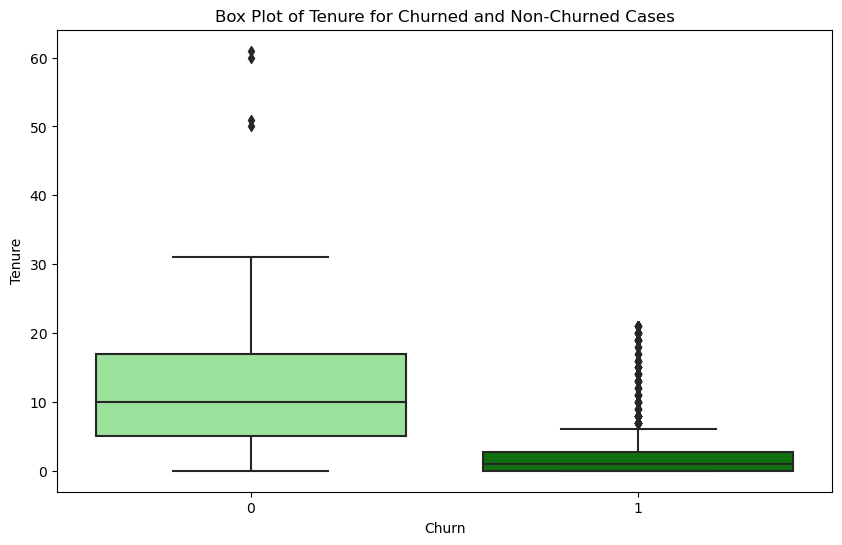

In [59]:
# membuat boxplot untuk kedua kasus pada fitur Tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Tenure', data=df, palette=['lightgreen', '#008000'])
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Box Plot of Tenure for Churned and Non-Churned Cases')
plt.show()

Terlihat pada kedua boxplot diatas bahwa terdapat outlier dibatasan atas, dan untuk outlier pada "Churn = 0" akan kita biarkan, dan kita akan menghapus outlier pada "Churn = 1". 

Berikutnya mari kita lihat seberapa banyak pelanggan yang dinyatakan Churn dan sudah berlangganan selama lebih dari 1 tahun (12 bulan).

In [121]:
df[(df['Churn'] == 1) & (df['Tenure'] > 12)]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
102,19.0,NaN,3,Mobile,3,Married,9,0,8.0,123.39,1
171,20.0,8.0,3,Others,4,Single,8,1,8.0,292.46,1
174,17.0,31.0,4,Fashion,5,Single,8,1,NaN,229.48,1
316,17.0,9.0,5,Fashion,1,Married,2,0,NaN,226.69,1
330,13.0,35.0,5,Laptop & Accessory,5,Single,5,0,4.0,167.84,1
...,...,...,...,...,...,...,...,...,...,...,...
3758,14.0,14.0,5,Fashion,2,Single,3,0,3.0,206.50,1
3784,18.0,8.0,3,Others,5,Married,6,1,4.0,298.59,1
3793,15.0,11.0,4,Mobile Phone,3,Married,11,1,8.0,149.61,1
3811,19.0,9.0,4,Laptop & Accessory,2,Single,6,0,4.0,176.60,1


Terlihat dari data diatas terdapat 61 pelanggan yang dinyatakan Churn dan sudah berlangganan selama lebih dari 12 bulan. Sebenarnya kita dapat menghapus outlier lebih banyak lagi (outlier kurang dari 12 bulan), akan tetapi 61 pelanggan dari total 674 pelanggan yang dinyatakan *Churn*, yang berarti sekitar **10%** merupakan angka yang besar, oleh karena itu mari kita hanya hapus **61 pelanggan** ini saja.

In [11]:
# menghapus data data pencilan
df_model = df_model.loc[~((df_model['Churn'] == 1) & (df_model['Tenure'] > 12))]

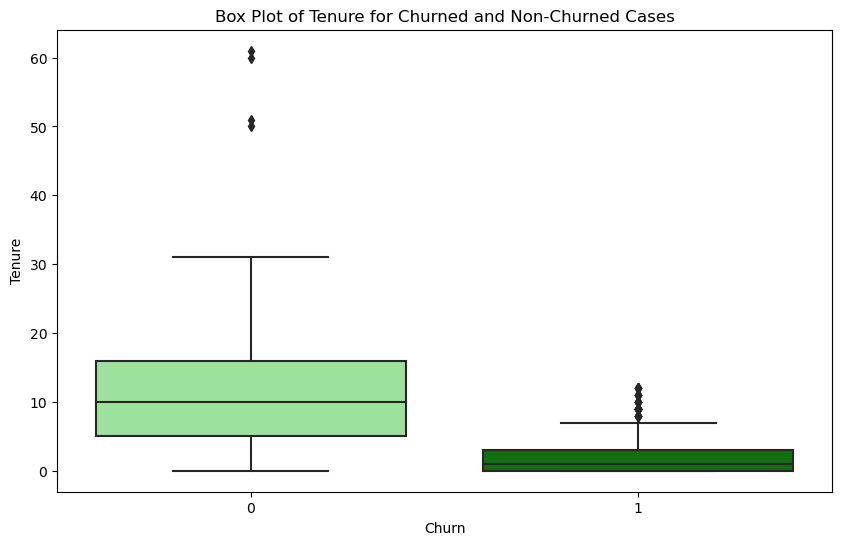

In [61]:
# melihat kembali boxplot untuk kedua kasus pada fitur Tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Tenure', data=df_model, palette=['lightgreen', '#008000'])
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Box Plot of Tenure for Churned and Non-Churned Cases')
plt.show()

terlihat bahwa outlier sudah berkurang pada fitur `Tenure` sudah berkurang, berikutnya kita akan mengurangi outlier pada fitur `DaySinceLastOrder`.

### Outliers pada DaySinceLastOrder

berkebalikan dari fitur `Tenure`, pada fitur `DaySinceLastOrder`, kita akan melihat outlier pada "Churn = 0", karena sesuai dengan nama fiturnya, fitur ini merupakan hari terakhir semenjak pelanggan menggunakan layanan E-commerce Pasarpedia, oleh karena itu masuk akal bahwa pelanggan tidak akan *Churn* jika semakin sering menggunakan layanan ini.

Maka, untuk outlier pada fitur `DaySinceLastOrder` dengan "Churn = 1" akan kita biarkan, dan sebaliknya, pada "Churn = 0" kita akan menghilangkan outlier untuk membuat model yang lebih baik. untuk itu mari kita lihat outlier pada kedua kasus diatas ini dengan boxplot.

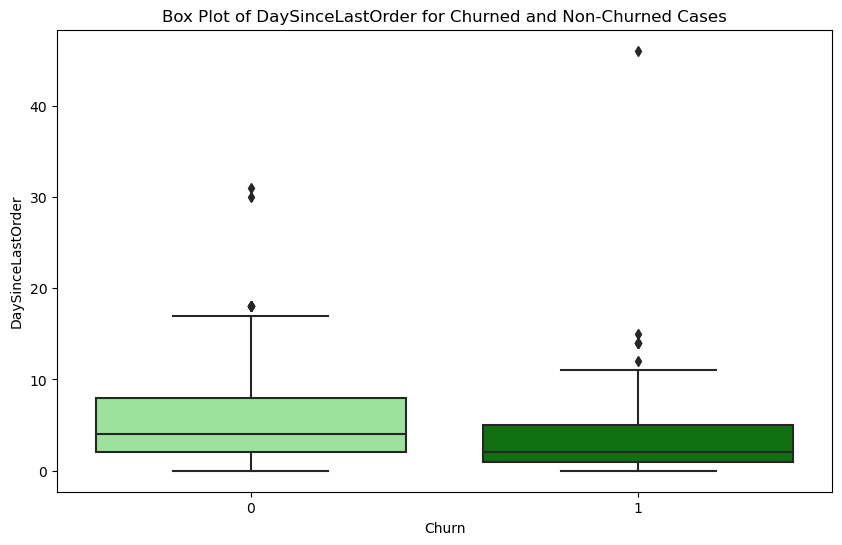

In [62]:
# membuat boxplot untuk kedua kasus pada fitur DaySinceLastOrder
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df, palette=['lightgreen', '#008000'])
plt.xlabel('Churn')
plt.ylabel('DaySinceLastOrder')
plt.title('Box Plot of DaySinceLastOrder for Churned and Non-Churned Cases')
plt.show()

Terlihat pada kedua boxplot diatas bahwa terdapat outlier dibatasan atas, dan untuk outlier pada "Churn = 1" akan kita biarkan, dan kita akan menghapus outlier pada "Churn = 0". 

Berikutnya mari kita lihat seberapa banyak pelanggan yang dinyatakan Churn dan sudah tidak menggunakan layanan selama 21 hari atau 3 minggu.

In [15]:
df[(df['Churn'] == 0) & (df['DaySinceLastOrder'] > 21)]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
181,3.0,11.0,3,Mobile,5,Married,6,0,30.0,132.04,0
3830,4.0,12.0,4,Mobile Phone,5,Married,7,0,31.0,157.04,0


terlihat terdapat **2 pelanggan** yang memenuhi kriteria diatas, oleh karena itu mari kita hapus outlier-outlier ini.

In [12]:
# menghapus data data pencilan
df_model = df_model.loc[~((df_model['Churn'] == 0) & (df_model['DaySinceLastOrder'] > 21))]

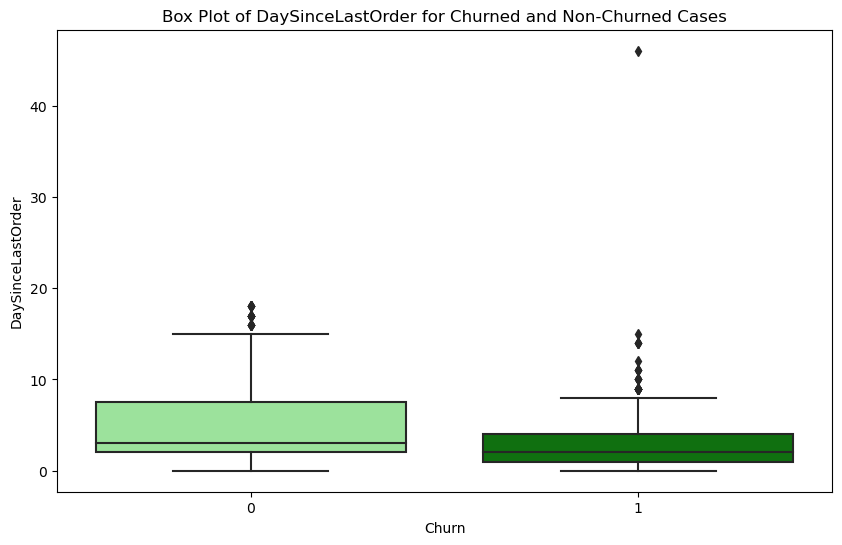

In [63]:
# melihat kembali boxplot untuk kedua kasus pada fitur DaySinceLastOrder
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df_model, palette=['lightgreen', '#008000'])
plt.xlabel('Churn')
plt.ylabel('DaySinceLastOrder')
plt.title('Box Plot of DaySinceLastOrder for Churned and Non-Churned Cases')
plt.show()

terlihat bahwa outlier sudah berkurang pada fitur `DaySinceLastOrder` sudah berkurang dan sebarannya terlihat lebih merapat pada "Churn = 0", berikutnya kita akan melihat outlier pada fitur `NumberOfAddress`.

### Outliers pada NumberOfAddress

Seperti yang disebutkan diatas, sekilas fitur `NumberOfAddress` memiliki jumlah maksimum yang besar, untuk itu mari kita lihat boxplot nya untuk melihat outlier pada fitur ini.

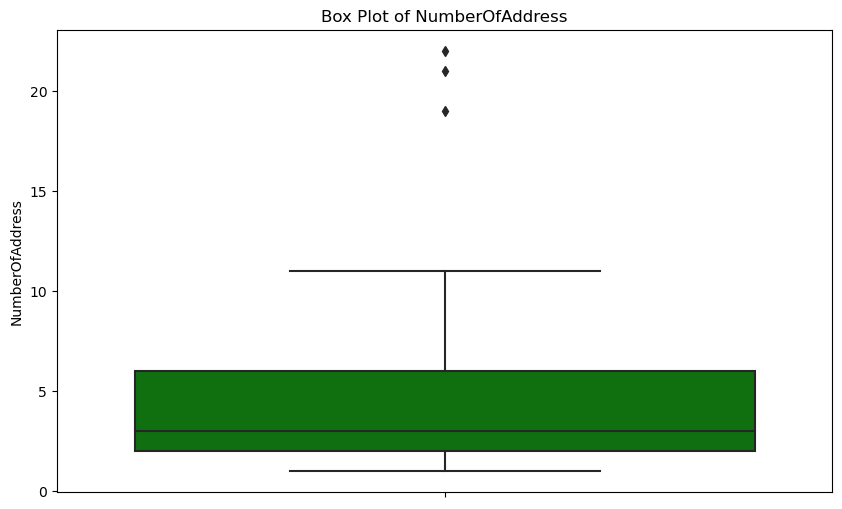

In [64]:
# membuat boxplot untuk NumberOfAddress
plt.figure(figsize=(10, 6))
sns.boxplot(y='NumberOfAddress', data=df, palette=['#008000'])
plt.ylabel('NumberOfAddress')
plt.title('Box Plot of NumberOfAddress')
plt.show()

terlihat pada boxplot bahwa outlier pada `NumberOfAddress` memiliki jarak yang jauh, untuk itu mari kita lihat jumlahnya dan detailnya.

In [24]:
df[df['NumberOfAddress'] >= 12]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
1581,NaN,10.0,3,Mobile,2,Single,19,1,0.0,122.85,1
2109,13.0,16.0,4,Laptop & Accessory,4,Single,22,0,4.0,192.82,0
3494,12.0,15.0,3,Laptop & Accessory,4,Single,21,0,3.0,167.82,0


terlihat bahwa terdapat 3 pelanggan yang memiliki alamat lebih dari 12, karena ini diluar batas kewajaran dan agar model dapat menjadi lebih optimal, mari kita hapus **3 pelanggan** ini dari dataset model.

In [13]:
# menghapus data data pencilan 
df_model = df_model.loc[~(df['NumberOfAddress'] >= 12)]

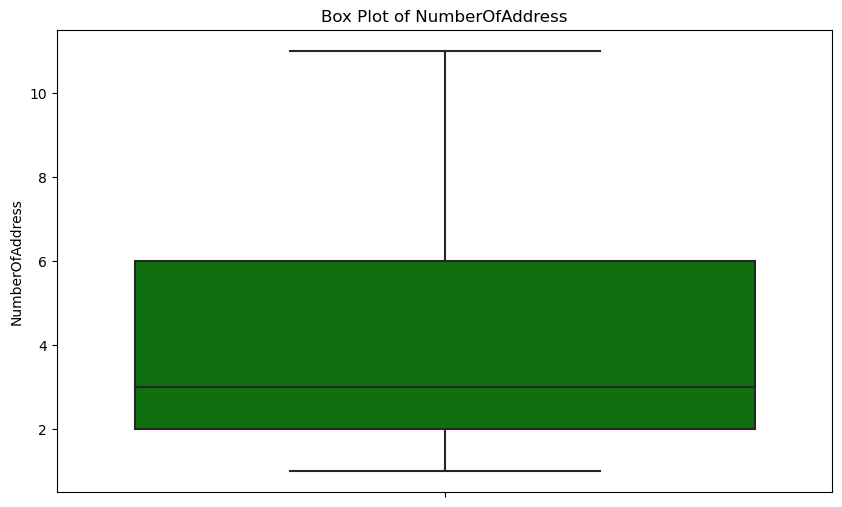

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='NumberOfAddress', data=df_model, palette=['#008000'])
plt.ylabel('NumberOfAddress')
plt.title('Box Plot of NumberOfAddress')
plt.show()

terlihat dari boxplot diatas bahwa *outlier* pada fitur `NumberOfAddress` sudah diatasi, dan dengan ini proses Data Cleaning sudah selesai dilakukan.

In [68]:
# overview dataset sebelum cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [13]:
# overview dataset setelah cleaning
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 3940
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3875 non-null   float64
 1   WarehouseToHome           3875 non-null   float64
 2   NumberOfDeviceRegistered  3875 non-null   int64  
 3   SatisfactionScore         3875 non-null   int64  
 4   NumberOfAddress           3875 non-null   int64  
 5   Complain                  3875 non-null   int64  
 6   DaySinceLastOrder         3875 non-null   float64
 7   CashbackAmount            3875 non-null   float64
 8   Churn                     3875 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 302.7 KB


dari kedua overview diatas terlihat bahwa dataset awal yang berjumlah 3.941 baris kini telah menjadi 3.875 baris dan kolom yang awalnya 11 baris menjadi 9 baris (menghilangkan `MaritalStatus` dan `PreferedOrderCat`), dan untuk keseluruhan kolom tidak memiliki *missing value*.

In [72]:
# melihat perbandingan flag Churn sebelum cleaning
df['Churn'].value_counts()

Churn
0    3267
1     674
Name: count, dtype: int64

In [71]:
# melihat perbandingan flag Churn setelah cleaning
df_model['Churn'].value_counts()

Churn
0    3263
1     612
Name: count, dtype: int64

dan untuk kolom target *Churn* mengalami sedikit perubahan rasio untuk mengoptimalisasikan model, yang dapat dilihat dari perhitungan nilai diatas.

# Data Preparation 

pada tahapan ini, biasanya kita melakukan fitur encoding untuk fitur-fitur categorical dan scaling untuk fitur-fitur numerical yang ada di dataset, akan tetapi untuk encoding tidak diperlukan karena kedua kolom yang memiliki nilai kategorikal sudah kita hapus karena alasan yang sudah disebutkan diatas, dan untuk fitur scaling juga tidak dilakukan karena model-model klasifikasi yang digunakan tidak berbasis jarak (contoh *eucledian distance* dan *manhattan distance*) dan tidak dipengaruhi oleh perbedaan skala antar fitur yang ada.

In [17]:
listItem = []
for col in df_model.columns :
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col])) * 100,2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,0,0.0,36,"[24.0, 12.0]"
1,WarehouseToHome,float64,0,0.0,33,"[34.0, 13.0]"
2,NumberOfDeviceRegistered,int64,0,0.0,6,"[3, 5]"
3,SatisfactionScore,int64,0,0.0,5,"[4, 1]"
4,NumberOfAddress,int64,0,0.0,11,"[1, 10]"
5,Complain,int64,0,0.0,2,"[0, 1]"
6,DaySinceLastOrder,float64,0,0.0,20,"[46.0, 15.0]"
7,CashbackAmount,float64,0,0.0,2297,"[150.76, 159.45]"
8,Churn,int64,0,0.0,2,"[0, 1]"


## Data Splitting

In [47]:
X = df_model.drop(columns=['Churn'])
y = df_model['Churn']

In [48]:
transformer = ColumnTransformer([
    ('passthrough', 'passthrough', X.columns),
], remainder='passthrough')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=2024)

In [17]:
testing = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
testing.head()

,passthrough__Tenure,passthrough__WarehouseToHome,passthrough__NumberOfDeviceRegistered,passthrough__SatisfactionScore,passthrough__NumberOfAddress,passthrough__Complain,passthrough__DaySinceLastOrder,passthrough__CashbackAmount
0,12.0,30.0,4.0,2.0,11.0,0.0,3.0,182.45
1,9.0,12.0,3.0,3.0,3.0,1.0,5.0,123.06
2,30.0,27.0,3.0,1.0,5.0,1.0,0.0,278.75
3,3.0,35.0,5.0,5.0,3.0,0.0,5.0,162.85
4,6.0,34.0,3.0,3.0,2.0,1.0,7.0,152.07


# Modeling & Evaluation

In [18]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

### Model Benchmarking : K-Fold

In [50]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

[LightGBM] [Info] Number of positive: 392, number of negative: 2088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 2480, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.158065 -> initscore=-1.672700
[LightGBM] [Info] Start training from score -1.672700
[LightGBM] [Info] Number of positive: 392, number of negative: 2088
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 2480, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.158065 -> initscore=-1.672700
[LightGBM] [In

,mean roc_auc,sdev
model,,
Random Forest,0.965318,0.004621
LightGBM,0.964896,0.004767
XGBoost,0.964376,0.006297
Logistic Regression,0.900160,0.012486
Decision Tree,0.861002,0.015955
KNN,0.852361,0.025867


Terlihat bahwa dari keenam model, terdapat 3 model yang memiliki nilai terbaik yang mirip yaitu `Random Forest`, `LightGBM`, dan `XGBoost`. mari kita lihat hasil benchmark lainnya.

### Model Benchmarking : Test Data

In [51]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,X_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(X_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       653
           1       0.68      0.45      0.54       122

    accuracy                           0.88       775
   macro avg       0.79      0.71      0.74       775
weighted avg       0.87      0.88      0.87       775

KNN 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       653
           1       0.63      0.43      0.51       122

    accuracy                           0.87       775
   macro avg       0.76      0.69      0.72       775
weighted avg       0.86      0.87      0.86       775

Decision Tree 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       653
           1       0.83      0.83      0.83       122

    accuracy                           0.95       775
   macro avg       0.90      0.90      0.90       775
weighted avg       0.95      0

,roc_auc score
model,
Random Forest,0.980807
LightGBM,0.976125
XGBoost,0.967866
Logistic Regression,0.900911
Decision Tree,0.897855
KNN,0.871639


disini terlihat kembali bahwa `Random Forest` tetap menduduki peringkat teratas untuk skor roc_auc dan menjadi model terbaik untuk dataset ini, maka kita akan menggunakannya sebagai model di dataset ini.

`Random Forest` adalah algoritma dalam machine learning yang digunakan untuk pengklasifikasian dataset dalam jumlah besar. Karena fungsinya bisa digunakan untuk banyak dimensi dengan berbagai skala dan performa yang tinggi. Klasifikasi ini dilakukan melalui penggabungan tree dalam decision tree dengan cara training dataset yang kita miliki. Random Forest bekerja dengan membangun beberapa decision tree dan menggabungkannya demi mendapatkan prediksi yang lebih stabil dan akurat. [(referensi)](https://algorit.ma/blog/cara-kerja-algoritma-random-forest-2022/)

berikutnya akan kita coba melakukan **oversampling** untuk mengetahui apakah kita dapat mendapatkan hasil yang lebih baik. 

### Test Oversampling with K-Fold Cross Validation

In [52]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [53]:
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=2024)

In [54]:
data = X_train
target = y_train

In [55]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # instantiate model
    rf = RandomForestClassifier()
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', rf)
    ])
    
    # Oversample only the training data
    ros = RandomOverSampler()
    X_ros, y_ros = ros.fit_resample(X_train, y_train)

    # calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, y_train, X_val, y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, y_ros, X_val, y_val, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

### Evaluation Metrics Without Oversampling

In [56]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,1.000000,0.948387,1.0,0.978771,1.000000,0.899684,1.000000,0.795918,1.0,0.866667
1,1.000000,0.941935,1.0,0.977950,1.000000,0.876066,1.000000,0.673469,1.0,0.942857
2,1.000000,0.932258,1.0,0.941630,1.000000,0.867173,1.000000,0.734694,1.0,0.818182
3,1.000000,0.925806,1.0,0.964774,1.000000,0.866106,1.000000,0.816327,1.0,0.740741
4,1.000000,0.951613,1.0,0.951912,1.000000,0.905123,1.000000,0.795918,1.0,0.886364
5,1.000000,0.951613,1.0,0.981390,1.000000,0.908340,1.000000,0.836735,1.0,0.854167
6,0.999642,0.925806,1.0,0.955548,0.999326,0.849129,0.997732,0.673469,1.0,0.825000
7,1.000000,0.938710,1.0,0.957190,1.000000,0.877646,1.000000,0.734694,1.0,0.857143
8,1.000000,0.961290,1.0,0.987763,1.000000,0.923419,1.000000,0.816327,1.0,0.930233
9,1.000000,0.967742,1.0,0.991321,1.000000,0.936182,1.000000,0.836735,1.0,0.953488


### Evaluation Metrics With Oversampling

In [57]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,1.0,0.954839,1.0,0.984948,1.0,0.916538,1.0,0.877551,1.0,0.843137
1,1.0,0.935484,1.0,0.972750,1.0,0.867567,1.0,0.693878,1.0,0.871795
2,1.0,0.935484,1.0,0.954922,1.0,0.878802,1.0,0.795918,1.0,0.795918
3,1.0,0.932258,1.0,0.964540,1.0,0.884777,1.0,0.918367,1.0,0.725806
4,1.0,0.945161,1.0,0.963953,1.0,0.896119,1.0,0.816327,1.0,0.833333
5,1.0,0.954839,1.0,0.982329,1.0,0.917859,1.0,0.897959,1.0,0.830189
6,1.0,0.925806,1.0,0.956760,1.0,0.861765,1.0,0.775510,1.0,0.760000
7,1.0,0.925806,1.0,0.959066,1.0,0.857043,1.0,0.734694,1.0,0.782609
8,1.0,0.958065,1.0,0.989053,1.0,0.917774,1.0,0.816327,1.0,0.909091
9,1.0,0.967742,1.0,0.992572,1.0,0.939401,1.0,0.897959,1.0,0.897959


Pada dua perbandingan metriks diatas kita dapat mengabaikan hasil dari dataset *Train* yang menghasilkan 100%, hal ini disebabkan karena pada dataset ini kita tidak menggunakan `Validation Set`, dan untuk dataset Train kita dapat melihat test ROC AUC dengan *Oversampling* sedikit lebih baik dan stabil, serta *Recall* yang menjadi lebih baik (karena kelas positif kita amplifikasi dengan *oversampling*, dan menjadi sama dengan kelas negatif), akan tetapi dengan *precision* yang juga ikut turun.

berikutnya kita akan melihat *Classification Reports* untuk masing masing model.

### Classification Reports Without Oversampling

In [58]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       261
           1       0.87      0.80      0.83        49

    accuracy                           0.95       310
   macro avg       0.91      0.89      0.90       310
weighted avg       0.95      0.95      0.95       310

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       261
           1       0.94      0.67      0.79        49

    accuracy                           0.94       310
   macro avg       0.94      0.83      0.88       310
weighted avg       0.94      0.94      0.94       310

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       261
           1       0.82      0.73      0.77        49

    accuracy                           0.93       310
   macro avg       0.88      0.85      0.87       310
weighted avg       0.93      0.93      0.93       310

              preci

### Classification Reports With Oversampling

In [59]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       261
           1       0.84      0.88      0.86        49

    accuracy                           0.95       310
   macro avg       0.91      0.92      0.92       310
weighted avg       0.96      0.95      0.96       310

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       261
           1       0.87      0.69      0.77        49

    accuracy                           0.94       310
   macro avg       0.91      0.84      0.87       310
weighted avg       0.93      0.94      0.93       310

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       261
           1       0.80      0.80      0.80        49

    accuracy                           0.94       310
   macro avg       0.88      0.88      0.88       310
weighted avg       0.94      0.94      0.94       310

              preci

dari kedua classification report diatas, terlihat setelah data di *oversampling* menjadi lebih stabil dan seimbang, maka akan digunakan model *oversampling*.

Berikutnya akan kita coba melakukan *tuning* pada *hyperparameter* pada model Random Forest untuk mendapatkan hasil yang lebih seimbang.

## Hyperparameter Tuning

In [60]:
ros = RandomOverSampler(random_state=2024)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
rf = RandomForestClassifier()

estimator = Pipeline([
    ('oversampling',ros),
    ('preprocess', transformer),
    ('model', rf)
])

In [64]:
hyperparam_space = {
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_depth': [2, 5, 8, 10, 15, 18, 19, 20],
    'model__min_samples_split': [1, 2, 3],
    'model__random_state': [2024]
}

In [65]:
grid = GridSearchCV(estimator, param_grid=hyperparam_space, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=2024))

In [66]:
grid.fit(X_train_resampled, y_train_resampled)
print(grid.best_score_)
print(grid.best_params_)

0.9995708078451402
{'model__max_depth': 19, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__random_state': 2024}


In [68]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=2024)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('passthrough', 'passthrough',
                                                  Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=19, random_state=2024))])

In [69]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',rf)
])
estimator.fit(X_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=2024)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('passthrough', 'passthrough',
                                                  Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

In [70]:
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default RF : ', roc_auc_default)
print('ROC AUC Score Tuned RF : ', roc_auc_tuned)

ROC AUC Score Default RF :  0.9800291215826074
ROC AUC Score Tuned RF :  0.9778889363090905


Terlihat bahwa skor Default lebih baik dibandingkan hasil tuningnya, untuk melihat lebih jelas, kita harus melihat hasil classification report nya.

In [71]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default RF : \n', report_default)
print('Classification Report Tuned RF : \n', report_tuned)

Classification Report Default RF : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       653
           1       0.90      0.87      0.88       122

    accuracy                           0.96       775
   macro avg       0.94      0.93      0.93       775
weighted avg       0.96      0.96      0.96       775

Classification Report Tuned RF : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       653
           1       0.88      0.85      0.87       122

    accuracy                           0.96       775
   macro avg       0.93      0.92      0.92       775
weighted avg       0.96      0.96      0.96       775



pada classification report ini terlihat jelas bahwa setting Default memiliki hasil sedikit lebih baik dari hasil tuning. Hal ini dapat terjadi karena walaupun pada `min_samples_leaf` dan `min_samples_split` mengikuti value default, pada tuning `max_depth` kita hanya memasukan angka bulat saja, sedangkan pada default dapat menemukan *sweet spot* yang dapat menaikan performa model.

### Feature Importances

Sekarang kita lihat fitur apa saja yang paling penting untuk model Random Forest ini.

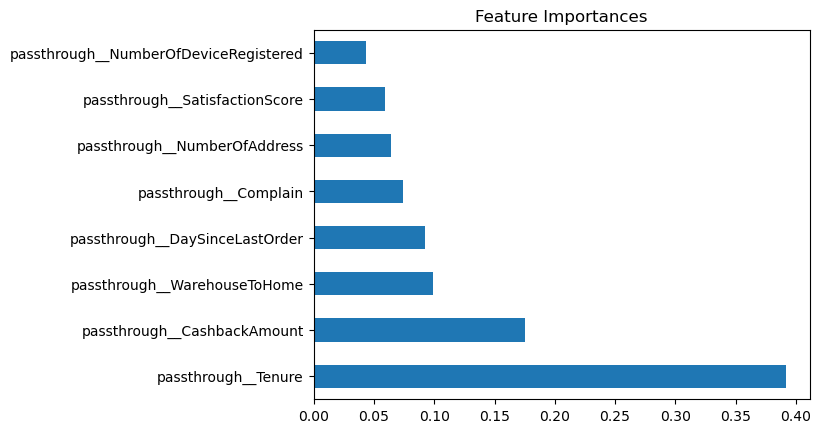

In [72]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

dari barplot diatas, dapat terlihat bahwa fitur `Tenure` sangatlah penting dalam mengindikasikan apakah seorang pelanggan akan *Churn* ataupun tidak, kemudian disusul oleh fitur `CashbackAmount` dimana ini berarti jumlah *Cashback* yang diterima oleh pelanggan juga penting dalam menentukan loyalitas mereka pada Pasarpedia ini.

### Limitasi Model

Model ini memiliki batasan pada pelanggan yang :
- Tenure berlangganan selama 0-61 bulan
- Memiliki jarak rumah dengan *warehouse* terdekat berjarak 5 - 127 kM
- Memiliki setidaknya 1 perangkat sampai 6 perangkat untuk mengakses layanan Pasarpedia
- Memiliki jumlah alamat sebanyak 1 - 12 alamat terdaftar.
- Menggunakan layanan setidaknya dalam 21 hari terakhir (3 minggu) untuk dinyatakan tidak *Churn*

# Conclusion & Recommendation

## Conclusion

In [44]:
print('Classification Report Default RF : \n', report_default)

Classification Report Default RF : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       653
           1       0.89      0.85      0.87       122

    accuracy                           0.96       775
   macro avg       0.93      0.92      0.92       775
weighted avg       0.96      0.96      0.96       775



Dapat disimpulkan dari report diatas bahwa model yang kita buat dapat menyaring pelanggan mana saja yang tidak membutuhkan promosi sebesar 98%, dan juga dapat menyaring sebanyak 85% untuk pelanggan yang akan melakukan *churn* sehingga dapat diberikan promosi oleh tim marketing.

Model ini memiliki ketepatan sebesar 89% untuk memprediksi pelanggan mana yang akan melakukan *Churn*, dan akan ada kemungkinan 2% dimana pelanggan yang sebenarnya *Loyal* pada layanan tetapi akan terprediksi *Churn*, sehingga akan ada kemungkinan kerugian untuk biaya promosinya.

Kemudian fitur yang paling penting dalam dataset ini ialah `Tenure` atau lamanya seorang pelanggan berlangganan, yang lalu disusul oleh `CashbackAmount` atau jumlah *cashback* yang diterima oleh pelanggan.

## Recommendation

### Model development
1. Dapat mengunakan undersampling dimana mungkin hasil akan lebih baik,
1. menambahkan fitur lain seperti banyaknya pengeluaran yang digunakan oleh pelanggan dalam kurun waktu tertentu.

### Business development
1. Diversifikasi promo yang dapat didapatkan oleh pelanggan (tidak hanya *Cashback*),
1. Membuat klasifikasi untuk pemberian promo yang bisa didapatkan oleh pelanggan, yang dapat memberikan efek promosi yang lebih tepat guna,
1. Mengklasifikasikan pelanggan menjadi beberapa kelas yang dapat diurutkan berdasarkan lama berlangganan (*Tenure*) dan/atau banyaknya jumlah uang yang diberikan oleh pelanggan.

# Sekian & Terima Kasih

In [73]:
import pickle

In [75]:
with open('Capstone 3 - Haiwal F.pkl', 'wb') as file:
    pickle.dump(estimator, file)